Преподаватель: Артур Сапрыкин, Павел Прокопьев, Наталья Баданина
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
from scipy.special import factorial

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline


In [51]:
# Скачайте материалы к занятию. 
airlines_passengers = pd.read_csv("international-airline-passengers.csv")['Count']
car_sales = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']
company_sales = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']

In [52]:
airlines_passengers.head()


0    112
1    118
2    132
3    129
4    121
Name: Count, dtype: int64

In [53]:
type(airlines_passengers)

pandas.core.series.Series

# Проанализируйте ряды,

In [54]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [55]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


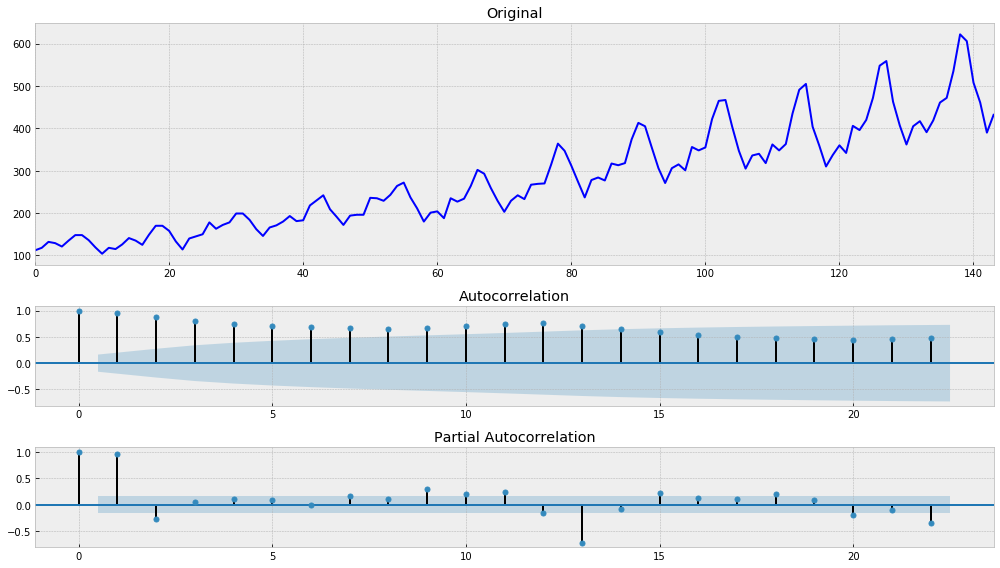

In [56]:
# First "airlines_passengers" 
tsplot(airlines_passengers)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


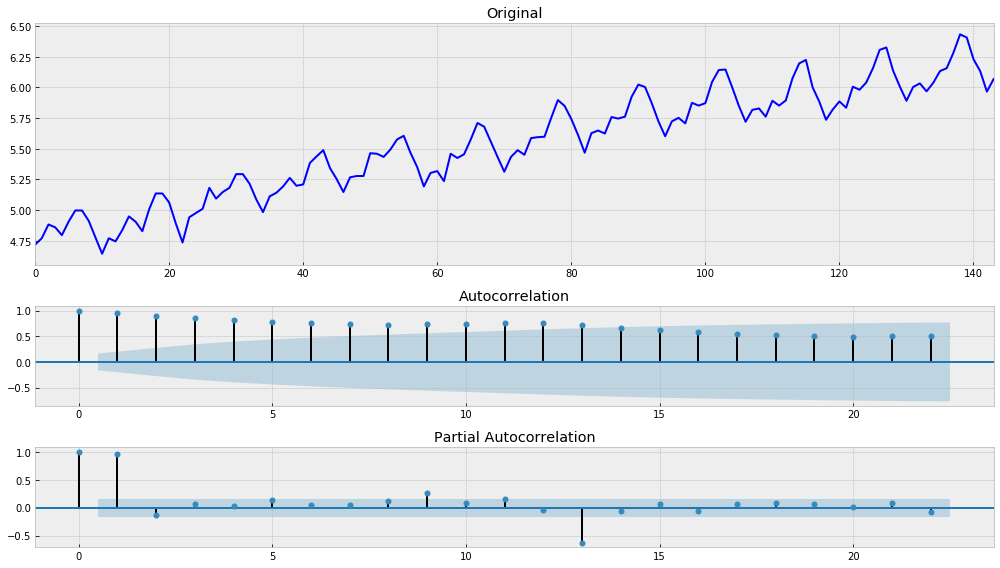

In [57]:
# сделайте их стационарными.
# The graph contains seasonality and trend
# Remove variance via BoxCox
airlines_passengers = boxcox(airlines_passengers, 0)
tsplot(airlines_passengers)


Results of Dickey-Fuller Test:
Test Statistic                  -2.877449
p-value                          0.048034
#Lags Used                      14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


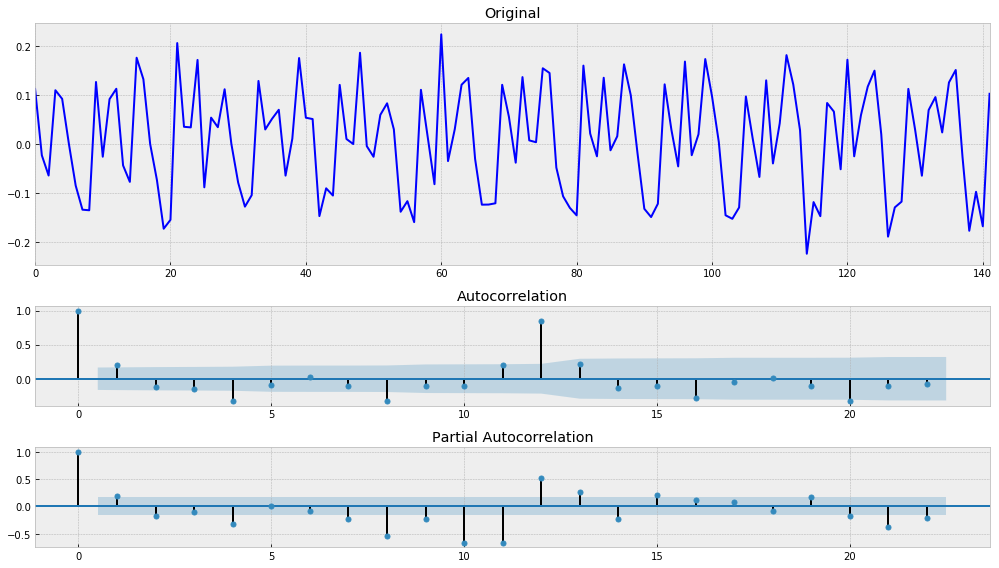

In [58]:
# Remove trend
series1 = airlines_passengers[1:] - airlines_passengers[:-1]
series1 = series1[1:]
tsplot(series1)

Results of Dickey-Fuller Test:
Test Statistic                  -4.549180
p-value                          0.000160
#Lags Used                      12.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64


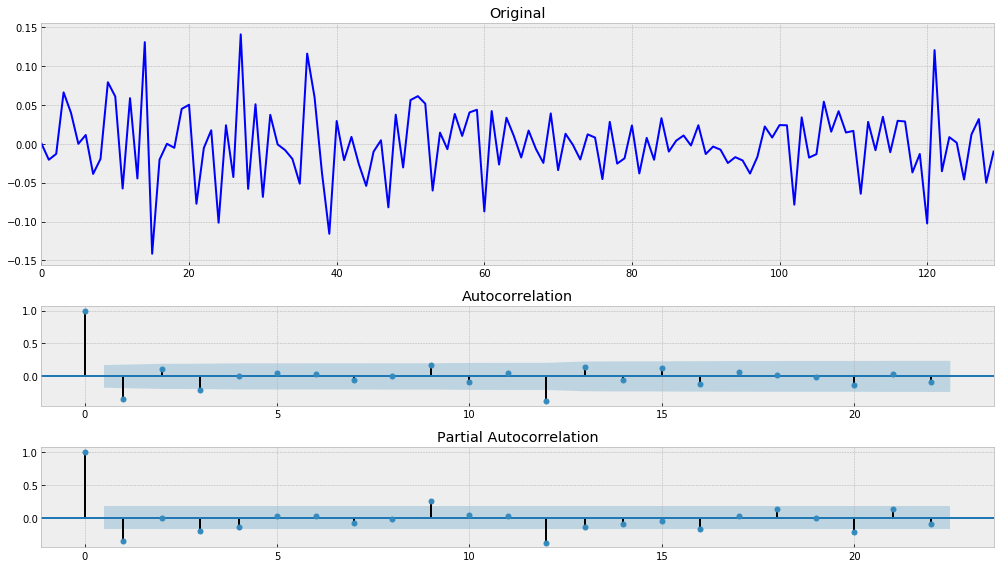

In [59]:
# remove seasonality
series1 = series1[12:] - series1[:-12]
tsplot(series1)

## Dickey-Fuller Test show stationarity for airlines_passengers

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


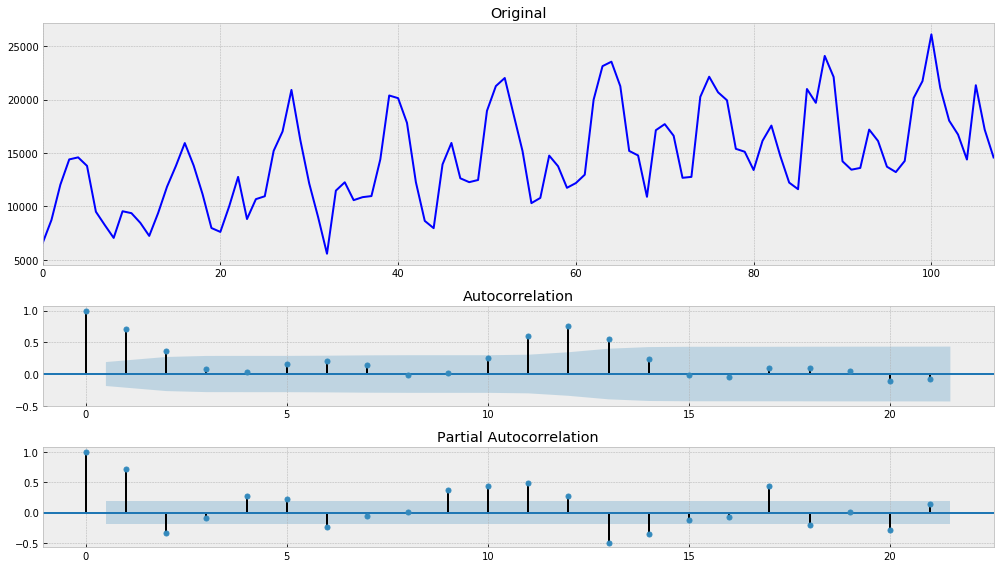

In [60]:
# Second "car_sales"
tsplot(car_sales)

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


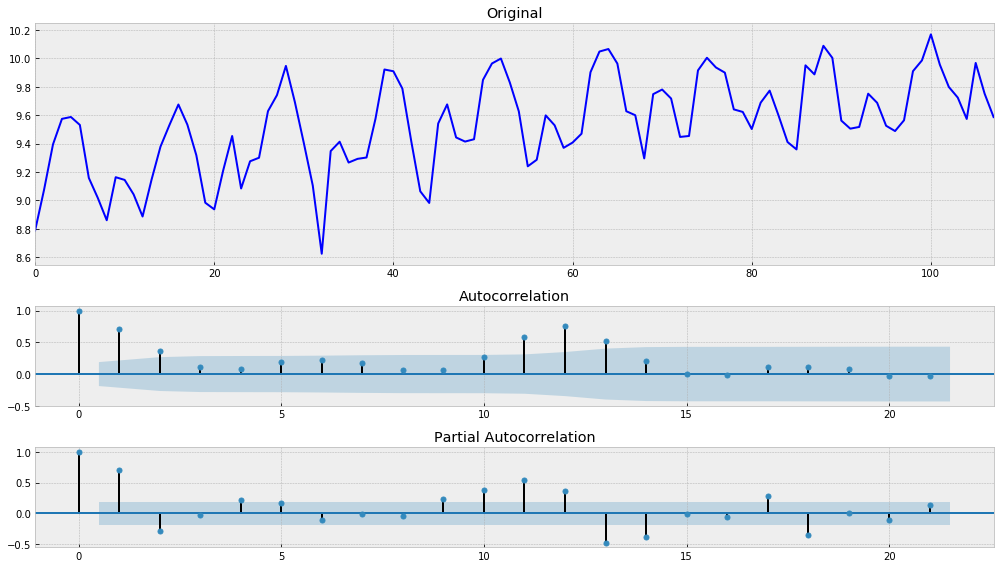

In [61]:
car_sales = boxcox(car_sales, 0)
tsplot(car_sales)
# better p-value, but not enough

Results of Dickey-Fuller Test:
Test Statistic                 -4.168242
p-value                         0.000745
#Lags Used                     12.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


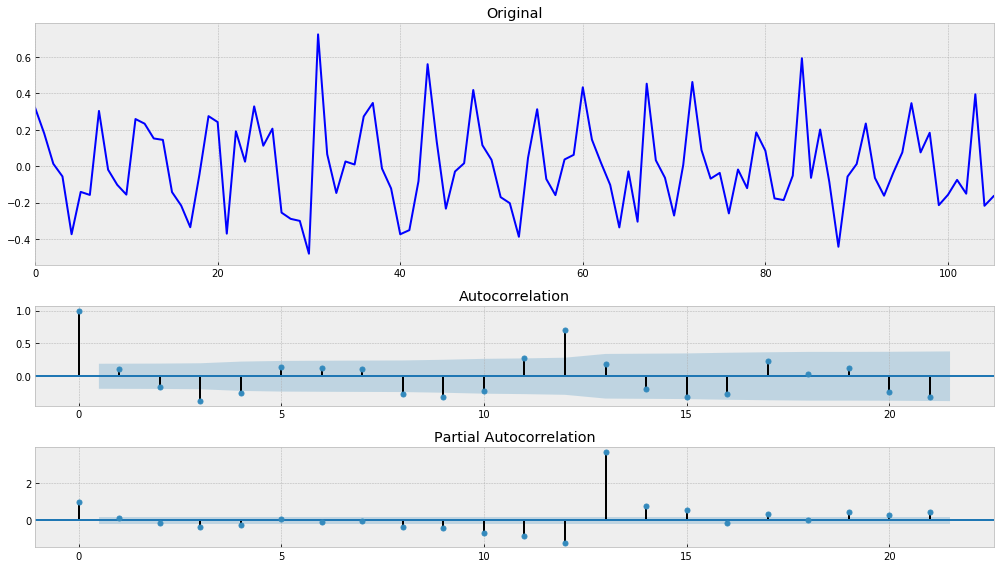

In [62]:
# Remove trend
series2 = car_sales[1:] - car_sales[:-1]
series2 = series2[1:]
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -3.463821
p-value                         0.008966
#Lags Used                     11.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


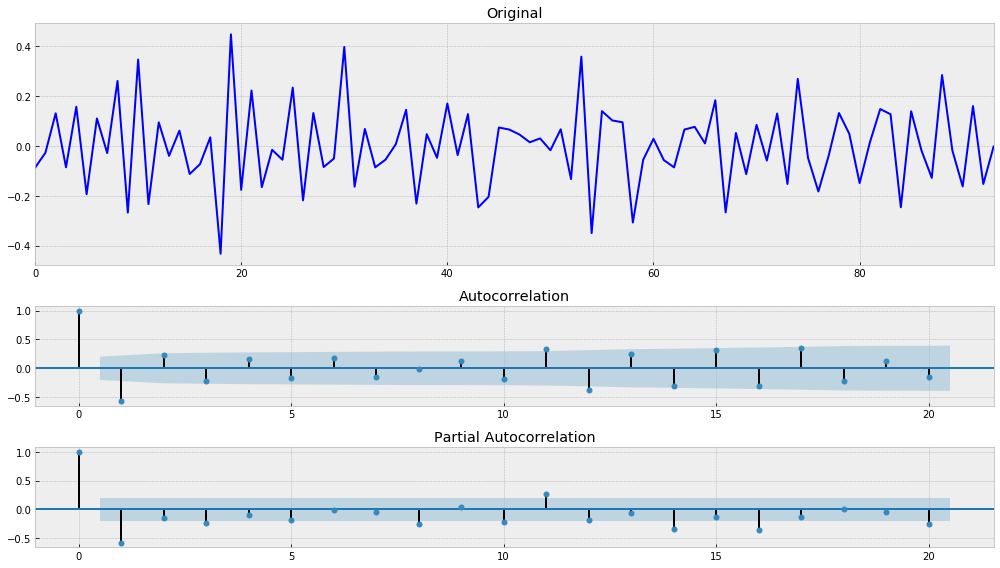

In [63]:
# remove seasonality
series2 = series2[12:] - series2[:-12]
tsplot(series2)

# Dickey-Fuller Test show stationarity for car_sales
# If I not remove seasonality, P-value lower. For car_sales better not remove seasonality

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


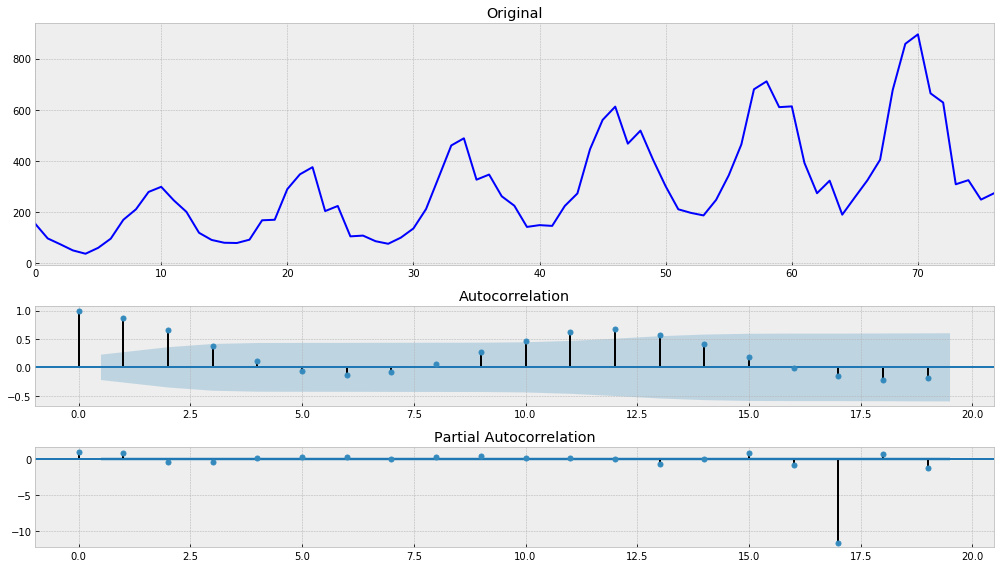

In [64]:
# third "company_sales"
tsplot(company_sales)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\User\AppData\Roaming\Python\Python36\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


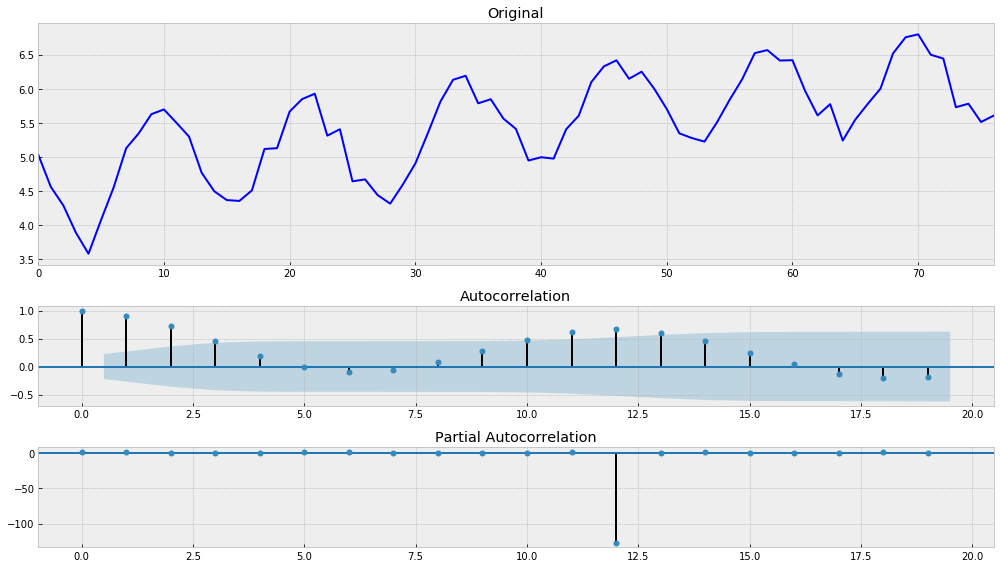

In [66]:
company_sales = boxcox(company_sales, 0)
tsplot(company_sales)
# better p-value, but not enough

Results of Dickey-Fuller Test:
Test Statistic                 -3.103828
p-value                         0.026271
#Lags Used                     11.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


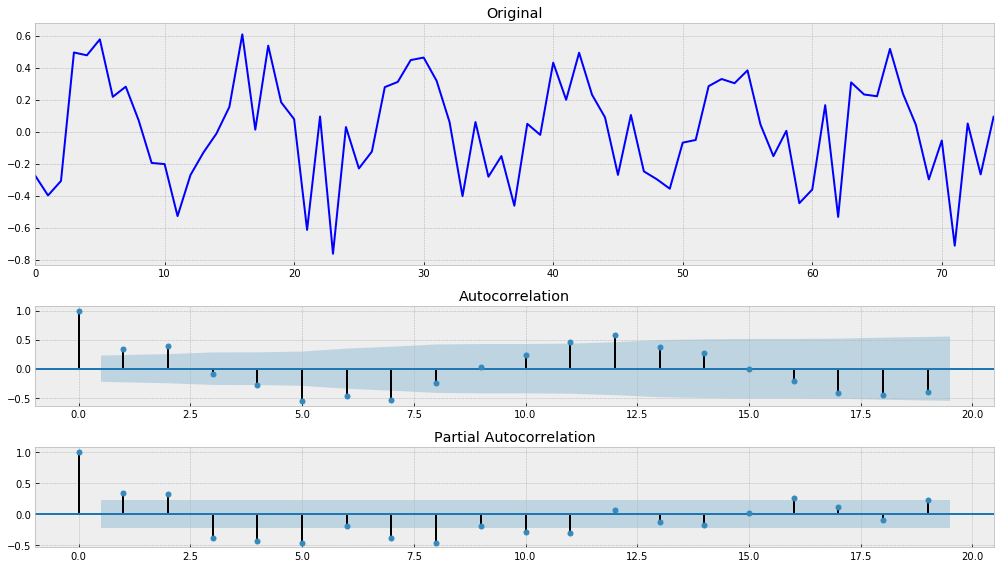

In [67]:
# Remove trend
series3 = company_sales[1:] - company_sales[:-1]
series3 = series3[1:]
tsplot(series3)
# P-value enought for stationarity, let's check seasonality

Results of Dickey-Fuller Test:
Test Statistic                 -2.225305
p-value                         0.197190
#Lags Used                     10.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


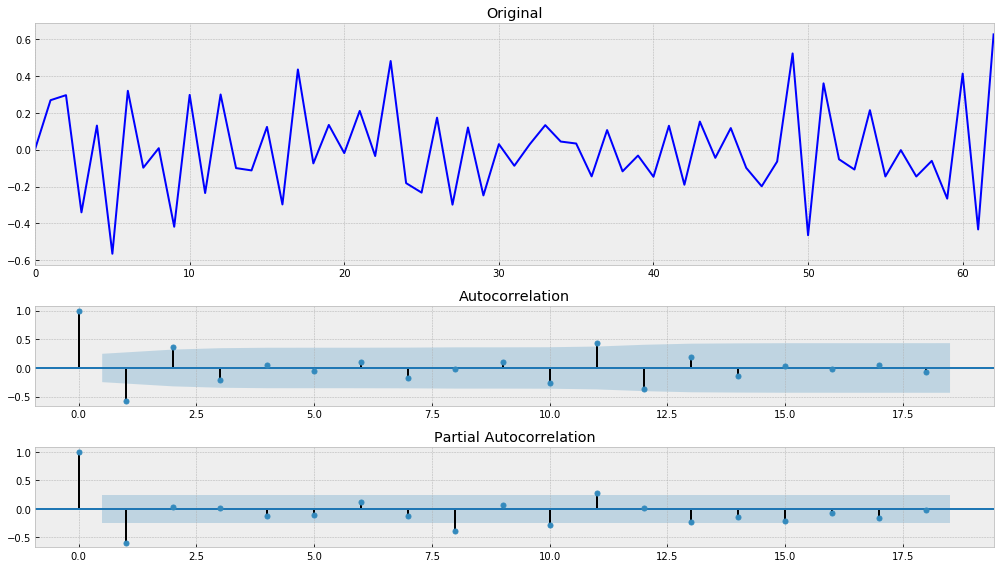

In [68]:
# remove seasonality
series3 = series3[12:] - series3[:-12]
tsplot(series3)
# If I revome seasonality, p-value began higher than 0.05. Stationa

## Dickey-Fuller Test show stationarity for company_sales
## If I not remove seasonality, P-value lower. For car_sales better not remove seasonality